# Advanced Python for Data Science
### DS-GA-3001.001/.002

### Homework Assignment 04
### Due date: 03/02/2020, 10:00AM
### Student's Name:
### Student's e-mail:

# Problem 1 (100 points)

The task is to optimize your solutions by using "line_profiler". 

Your submission "2020_spring_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

The main idea of the original solution:
- Initialize n points, moving directions and an empty list to store minimal distance for each step
- Loop over each step:\
    1) loop over each point to get new point
         1.1 Get random move r_i from uniform distribution[0, delta]
         1.2 Randomly choose a direction
         1.3 Calculate new coordinate for the point
         1.4 Constrain the moved point within the unit square
    2) loop over each pair to get minimal distance

In [3]:
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    
    # initialize n points
    point_list = [[random.random(), random.random()] for i in range(n)]
    
    # initialize moving directions
    direction_list= [[-1,0], [1,0], [0,-1], [0,1]]
    
    lst_of_min_distances = []

    for step in range(T):
        for idx in range(len(point_list)):
            p_i = point_list[idx]
            r_i = random.uniform(0, delta)
            u_i = np.array(random.choice(direction_list))
            # calculate new coordinates for each point
            p_i_new = p_i + r_i * u_i
            # constrain the points to be within the unit square
            point_list[idx] = [min(max(p_i_new[0], 0), 1), min(max(p_i_new[1], 0), 1)]
        
        # naive way to find the minimal distance
        min_dist = float('inf')

        for idx_1, point_1 in enumerate(point_list):
            for idx_2, point_2 in enumerate(point_list):
                if idx_1 < idx_2:
                    dist = np.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)
                    min_dist = min(min_dist, dist)

        lst_of_min_distances.append(min_dist)
    
    return lst_of_min_distances

In [4]:
n = 1000
delta = 1.0 / n
T = 25

In [11]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T)

len: 50


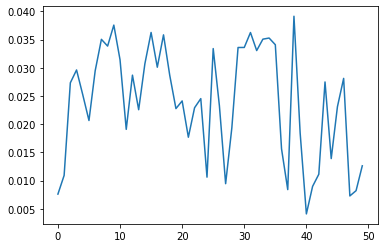

In [12]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.squeeze(np.array(lst_min_dist)) * np.sqrt(n))
plt.show()

Timer unit: 1e-06 s

Total time: 148.865 s
File: <ipython-input-3-08290b8bdab6>
Function: main_original at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def main_original(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit square 
     4                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     5                                               T: number of iterations
     6                                               return: 
     7                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     8                                               it is a list of reals of length T"""
     9                                               
    10                                               # initialize n points
    11         1       1032.0   1032.0      0.0      point_list = [[random.random(), random.random()] for i in range(n)]
    12                                               
    13                                               # initialize moving directions
    14         1          4.0      4.0      0.0      direction_list= [[-1,0], [1,0], [0,-1], [0,1]]
    15                                               
    16         1          2.0      2.0      0.0      lst_of_min_distances = []
    17                                           
    18        51         46.0      0.9      0.0      for step in range(T):
    19     50050      30515.0      0.6      0.0          for idx in range(len(point_list)):
    20     50000      34409.0      0.7      0.0              p_i = point_list[idx]
    21     50000      68796.0      1.4      0.0              r_i = random.uniform(0, delta)
    22     50000     254058.0      5.1      0.2              u_i = np.array(random.choice(direction_list))
    23                                                       # calculate new coordinates for each point
    24     50000     251262.0      5.0      0.2              p_i_new = p_i + r_i * u_i
    25                                                       # constrain the points to be within the unit square
    26     50000     136480.0      2.7      0.1              point_list[idx] = [min(max(p_i_new[0], 0), 1), min(max(p_i_new[1], 0), 1)]
    27                                                   
    28                                                   # naive way to find the minimal distance
    29        50        109.0      2.2      0.0          min_dist = float('inf')
    30                                           
    31     50050      32215.0      0.6      0.0          for idx_1, point_1 in enumerate(point_list):
    32  50050000   28866056.0      0.6     19.4              for idx_2, point_2 in enumerate(point_list):
    33  50000000   27479795.0      0.5     18.5                  if idx_1 < idx_2:
    34  24975000   71906201.0      2.9     48.3                      dist = np.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2)
    35  24975000   19804264.0      0.8     13.3                      min_dist = min(min_dist, dist)
    36                                           
    37        50        118.0      2.4      0.0          lst_of_min_distances.append(min_dist)
    38                                               
    39         1          0.0      0.0      0.0      return lst_of_min_distances


### Optimized solution using pdist
---

Most of the time is spent in calculating the euclidean distance between each pair of points. We can use pdist function from scipy to make it faster. pdist calculates Pairwise distances between observations in n-dimensional space.

---


In [13]:
from scipy.spatial.distance import pdist

def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    
    point_list = [[random.random(), random.random()] for i in range(n)]
    
    # initialize moving directions
    direction_list= [[-1,0], [1,0], [0,-1], [0,1]]
    
    lst_of_min_distances = []
        

    for step in range(T):
        for idx in range(len(point_list)):
            p_i = point_list[idx]
            r_i = random.uniform(0, delta)
            u_i = np.array(random.choice(direction_list))
            # calculate new coordinates for each point
            p_i_new = p_i + r_i * u_i
            # constrain the points to be within the unit square
            point_list[idx] = [min(max(p_i_new[0], 0), 1), min(max(p_i_new[1], 0), 1)]
        
        # naive way to find the minimal distance
        min_dist = min(pdist(point_list))

        lst_of_min_distances.append(min_dist)
    
    return lst_of_min_distances, 

In [14]:
n = 1000
delta = 1.0 / n
T = 50

In [15]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T)

len: 1


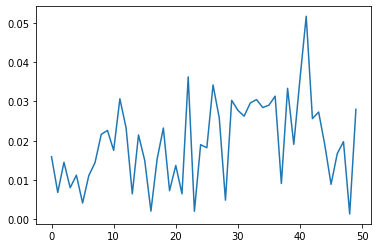

In [16]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.squeeze(np.array(lst_min_dist) * np.sqrt(n)))
plt.show()

In [ ]:
Timer unit: 1e-06 s

Total time: 2.53935 s
File: <ipython-input-13-be5f32d16b92>
Function: main_optimized at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     3                                           def main_optimized(n, delta, T): 
     4                                               """ 
     5                                               n: is the number of uniformly at random generated points in the unit square 
     6                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     7                                               T: number of iterations
     8                                               return: 
     9                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    10                                               it is a list of reals of length T"""
    11                                               
    12         1        375.0    375.0      0.0      point_list = [[random.random(), random.random()] for i in range(n)]
    13                                               
    14                                               # initialize moving directions
    15         1          1.0      1.0      0.0      direction_list= [[-1,0], [1,0], [0,-1], [0,1]]
    16                                               
    17         1          0.0      0.0      0.0      lst_of_min_distances = []
    18                                                   
    19                                           
    20        51         41.0      0.8      0.0      for step in range(T):
    21     50050      25219.0      0.5      1.0          for idx in range(len(point_list)):
    22     50000      28982.0      0.6      1.1              p_i = point_list[idx]
    23     50000      55756.0      1.1      2.2              r_i = random.uniform(0, delta)
    24     50000     225064.0      4.5      8.9              u_i = np.array(random.choice(direction_list))
    25                                                       # calculate new coordinates for each point
    26     50000     199357.0      4.0      7.9              p_i_new = p_i + r_i * u_i
    27                                                       # constrain the points to be within the unit square
    28     50000     121218.0      2.4      4.8              point_list[idx] = [min(max(p_i_new[0], 0), 1), min(max(p_i_new[1], 0), 1)]
    29                                                   
    30                                                   # naive way to find the minimal distance
    31        50    1883238.0  37664.8     74.2          min_dist = min(pdist(point_list))
    32                                           
    33        50        100.0      2.0      0.0          lst_of_min_distances.append(min_dist)
    34                                               
    35         1          1.0      1.0      0.0      return lst_of_min_distances,


### Solution without pdist

We can use numpy's broadcasting and vectorization to calculate the pairwise distance matrix D where

D[i,j] = distance(p[i], p[j])

if p is the array of points, shape of p would be (n,2)

p[None, :] will be of shape (1,n,2)

p[:,None] will be of shape (n,1,2)

We obtain the pairwise difference m =  p[None,:] - p[:,None]

We want to end up with an nxn matrix, so we sum over the axis with dimension 2. This is axis = 2 or axis = -1, since it is the first axis from the end

np.sum((pts[None, :] - pts[:, None])**2, -1)


Since the diagonal elements would be zero, we want to calculate the minimum of the non diagonal elements of this matrix. For that we can fill all the diagonal elements with infinity, and use np.min(D) to get the minimum distance




In [45]:
def pdist2(pts):
    return np.sqrt(np.sum((pts[None, :] - pts[:, None])**2, -1))

def main_optimized_numpy(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    
    point_list = np.array([[random.random(), random.random()] for i in range(n)])
    
    # initialize moving directions
    direction_list= [[-1,0], [1,0], [0,-1], [0,1]]
    
    lst_of_min_distances = []
        

    for step in range(T):
        for idx in range(len(point_list)):
            p_i = point_list[idx]
            r_i = random.uniform(0, delta)
            u_i = np.array(random.choice(direction_list))
            # calculate new coordinates for each point
            p_i_new = p_i + r_i * u_i
            # constrain the points to be within the unit square
            point_list[idx] = [min(max(p_i_new[0], 0), 1), min(max(p_i_new[1], 0), 1)]
        
        # naive way to find the minimal distance
        d_mat = pdist2(point_list)
        np.fill_diagonal(d_mat, np.inf)
        
        min_dist = np.min(d_mat)

        lst_of_min_distances.append(min_dist)
    
    return lst_of_min_distances, 

In [46]:
%lprun -f main_optimized_numpy lst_min_dist = main_optimized_numpy(n, delta, T)

len: 1


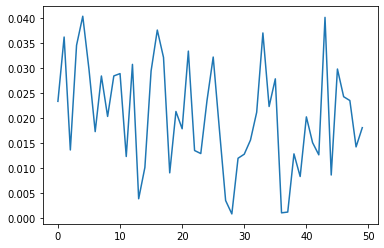

In [47]:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.squeeze(np.array(lst_min_dist) * np.sqrt(n)))
plt.show()

In [ ]:
Timer unit: 1e-06 s

Total time: 1.67867 s
File: <ipython-input-45-a0d4faf2a033>
Function: main_optimized_numpy at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     4                                           def main_optimized_numpy(n, delta, T): 
     5                                               """ 
     6                                               n: is the number of uniformly at random generated points in the unit square 
     7                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     8                                               T: number of iterations
     9                                               return: 
    10                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    11                                               it is a list of reals of length T"""
    12                                               
    13         1        572.0    572.0      0.0      point_list = np.array([[random.random(), random.random()] for i in range(n)])
    14                                               
    15                                               # initialize moving directions
    16         1          1.0      1.0      0.0      direction_list= [[-1,0], [1,0], [0,-1], [0,1]]
    17                                               
    18         1          1.0      1.0      0.0      lst_of_min_distances = []
    19                                                   
    20                                           
    21        51         36.0      0.7      0.0      for step in range(T):
    22     50050      27748.0      0.6      1.7          for idx in range(len(point_list)):
    23     50000      31922.0      0.6      1.9              p_i = point_list[idx]
    24     50000      56809.0      1.1      3.4              r_i = random.uniform(0, delta)
    25     50000     216021.0      4.3     12.9              u_i = np.array(random.choice(direction_list))
    26                                                       # calculate new coordinates for each point
    27     50000     132305.0      2.6      7.9              p_i_new = p_i + r_i * u_i
    28                                                       # constrain the points to be within the unit square
    29     50000     169338.0      3.4     10.1              point_list[idx] = [min(max(p_i_new[0], 0), 1), min(max(p_i_new[1], 0), 1)]
    30                                                   
    31                                                   # naive way to find the minimal distance
    32        50    1018644.0  20372.9     60.7          d_mat = pdist2(point_list)
    33        50       1233.0     24.7      0.1          np.fill_diagonal(d_mat, np.inf)
    34                                                   
    35        50      23969.0    479.4      1.4          min_dist = np.min(d_mat)
    36                                           
    37        50         72.0      1.4      0.0          lst_of_min_distances.append(min_dist)
    38                                               
    39         1          1.0      1.0      0.0      return lst_of_min_distances,
